# Análise exploratória de dados

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


In [3]:
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 1. Descrição dos dados

In [4]:
null_counts = df.isnull().sum()

print(null_counts)

display(Markdown(
    "---\n"
    f"Sabemos assim que a não existem valores faltantes."))

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


---
Sabemos assim que a não existem valores faltantes.

In [5]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


Observações:

- Mulheres são a maioria no conjunto de dados;
- A idade média dos pacientes é de aproximadamente 42 anos;
- O paciente mais jovem tinha aproximadamente 1 mês de vida;
- O paciente mais velho tinha 80 anos.

---

Vamos verificar a necessidade de manter o valor "Other" da coluna "gender"

In [7]:
count = (df['gender'] == 'Other').sum() #conta a presença do valor "Other" na coluna "gender"
print(f"Número de linhas com 'other' na coluna 'gender': {count}")

Número de linhas com 'other' na coluna 'gender': 18


Sendo um valor irrisório comparado à quantidade de dados nesse dataset, removeremos os valores "Other" da coluna.

In [8]:
df = df[df['gender'] != 'Other']

---

Agora verificaremos a presença de linhas duplicadas. Considerando a variabilidade em casas decimais de algumas variáveis, podemos assumir que linhas com os mesmos valores se referem ao mesmo paciente.

In [10]:
duplicatas: int = df.duplicated().sum()
print(f"Número de duplicatas: {duplicatas}")
df = df.drop_duplicates()

Número de duplicatas: 3854


## 2. Perguntas de partida e hipóteses

## 3 Análises

### 3.1 Análises univariadas

Text(0.5, 0, '')

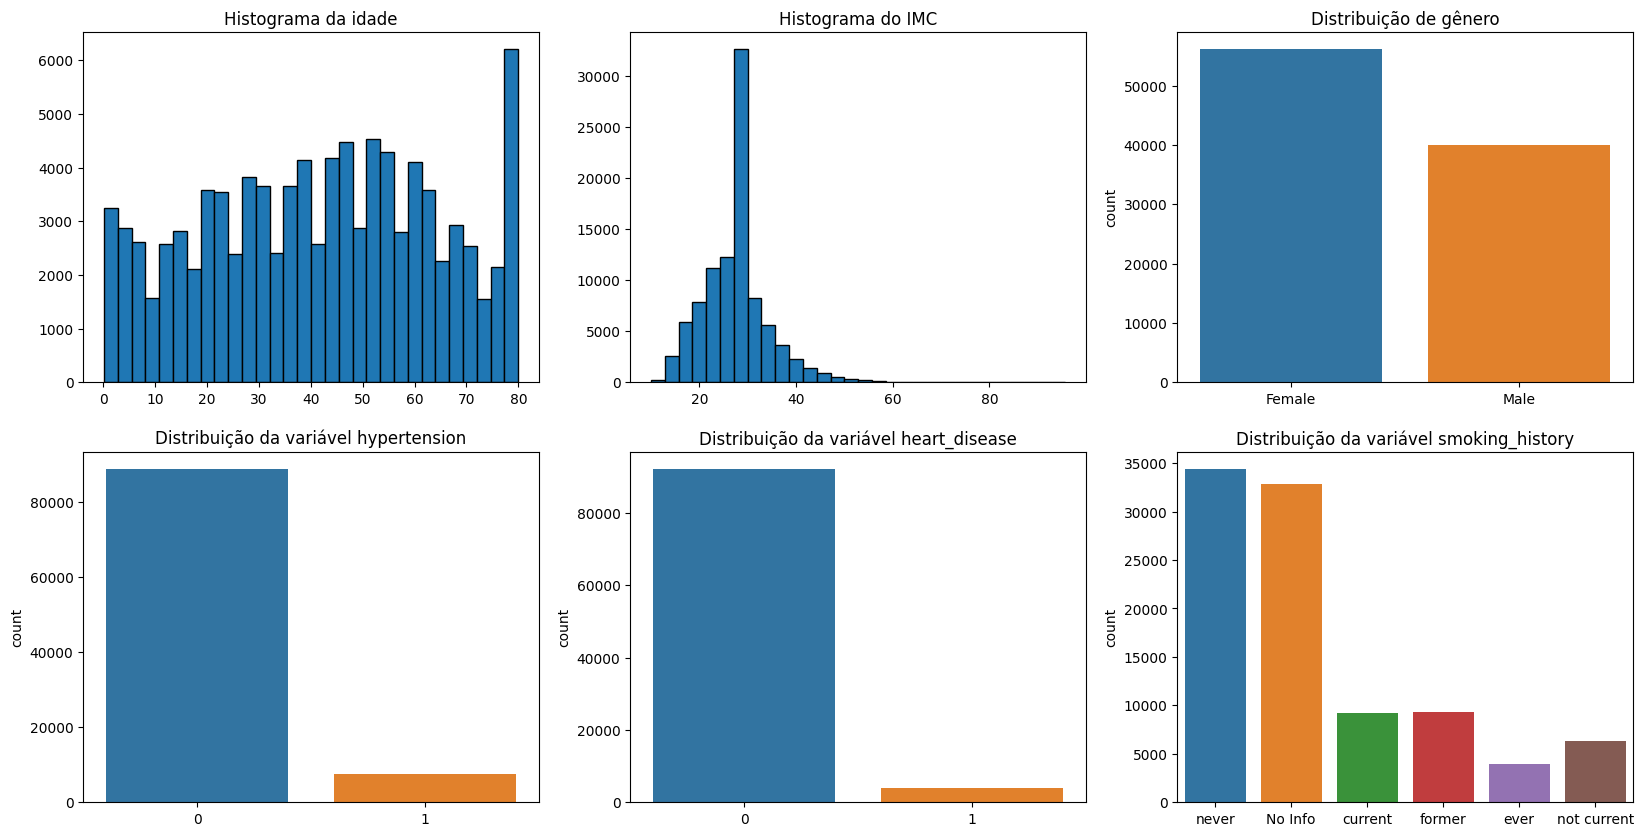

In [18]:
fig, axes = plt.subplots(2,3,figsize=(20, 10)) #cria conjunto de gráficos e define o tamanho

#historgrama da idade
ax = df['age'].hist(bins=30, ax=axes[0,0], edgecolor='black') #cria o histograma
ax.grid(False) #remove grade
ax.set_title('Histograma da idade') #adiciona título

#histograma do IMC
ax = df['bmi'].hist(bins=30, ax=axes[0,1], edgecolor='black')
ax.grid(False)
ax.set_title('Histograma do IMC')

# gráfico da distribuição de gênero
sns.countplot(x='gender',data=df, ax=axes[0,2]) #cria o gráfico
axes[0,2].set_title('Distribuição de gênero') # adiciona título
axes[0,2].set_xlabel('')  #remove a legenda inferior

# Gráfico da variável hypertension
sns.countplot(x='hypertension',data=df, ax=axes[1,0])
axes[1,0].set_title('Distribuição da variável hypertension')
axes[1,0].set_xlabel('')


# Gráfico da variável heart_disease
sns.countplot(x='heart_disease',data=df, ax=axes[1,1])
axes[1,1].set_title('Distribuição da variável heart_disease')
axes[1,1].set_xlabel('')

# Gráfico da variável smoking_history
sns.countplot(x='smoking_history',data=df, ax=axes[1,2])
axes[1,2].set_title('Distribuição da variável smoking_history')
axes[1,2].set_xlabel('')

> observações aqui

### 3.2 Análise bivariada

/home/paulo/equipe2-2024.2/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


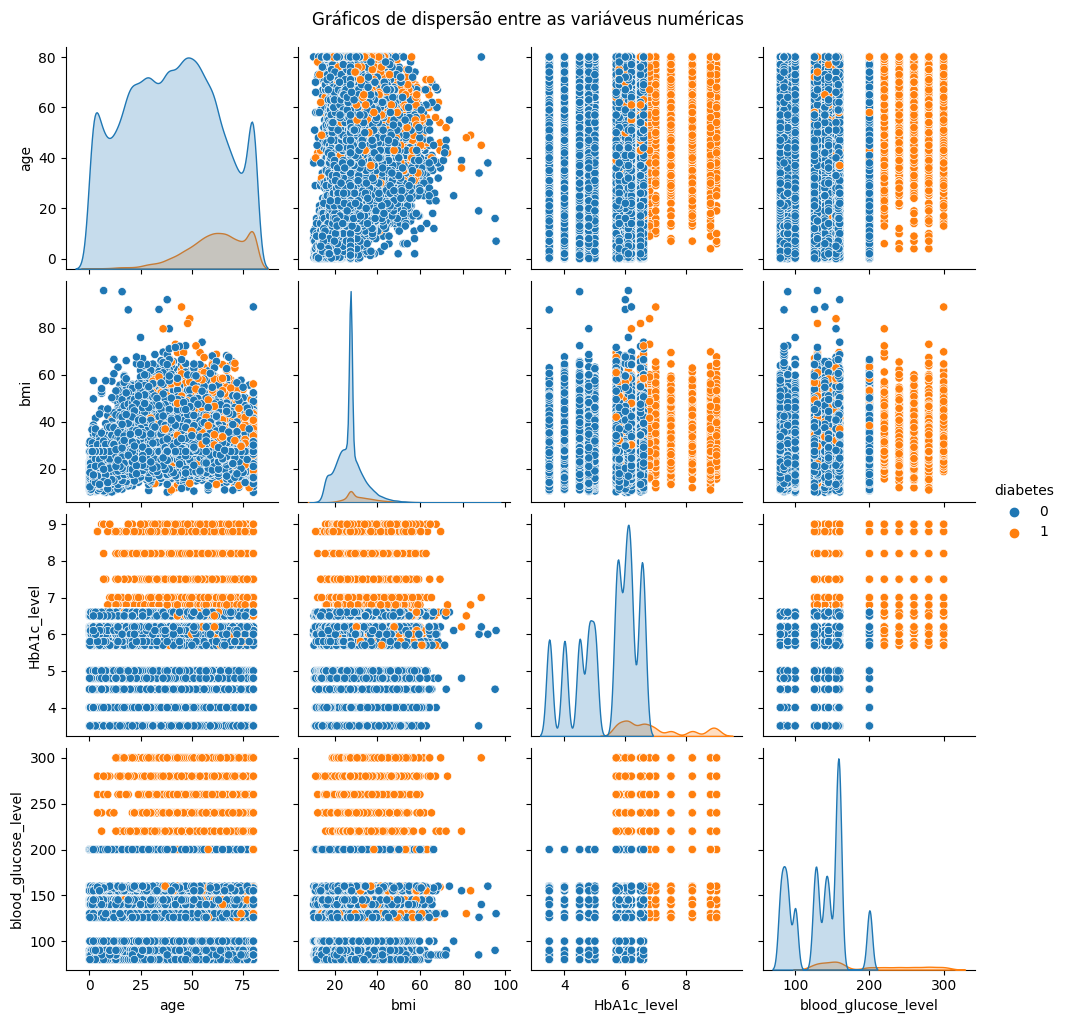

In [21]:
# Gráficos de dispersão entre variáveis numéricas
num_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes'] #seleciona apenas as variáveis numéricas
sns.pairplot(df[num_vars], hue='diabetes') #cria uma matriz de gráficos de dispersão
plt.suptitle('Gráficos de dispersão entre as variáveus numéricas',y=1.02)
plt.show()

Text(0, 0.5, 'glicose no sangue')

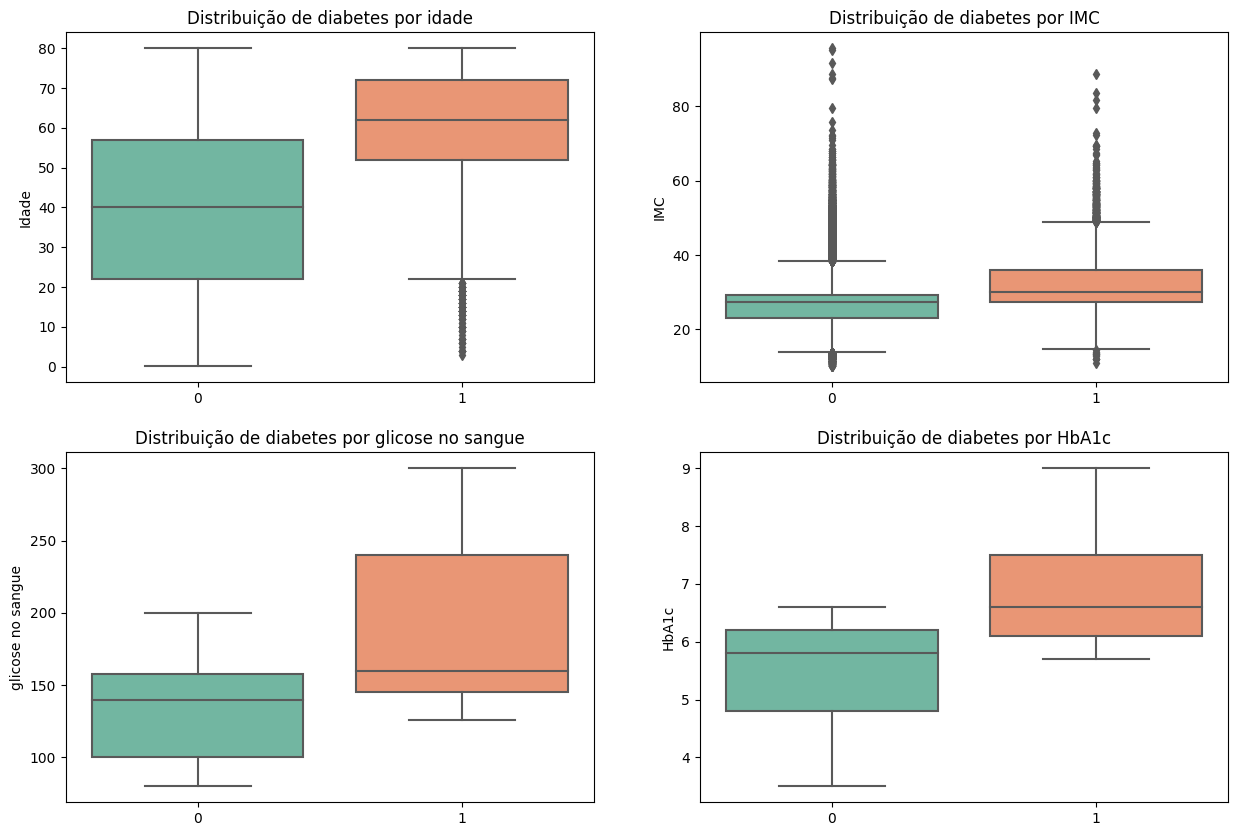

In [24]:
fig, axes = plt.subplots(2,2,figsize=(15, 10)) #cria conjunto de gráficos e define o tamanho


#boxplot de diabetes por idade
sns.boxplot(x='diabetes', y='age', data=df, palette='Set2',ax = axes[0,0]) #cria o gráfico
axes[0,0].set_title('Distribuição de diabetes por idade') #adiciona título
axes[0,0].set_xlabel('') #remove legenda inferior
axes[0,0].set_ylabel('Idade')

#boxplot de diabetes por IMC
sns.boxplot(x='diabetes',y='bmi', data=df, palette='Set2',ax = axes[0,1])
axes[0,1].set_title('Distribuição de diabetes por IMC')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('IMC')

#boxplot de HbA1c por diabetes
sns.boxplot(x='diabetes',y='HbA1c_level', data=df, palette='Set2',ax = axes[1,1])
axes[1,1].set_title('Distribuição de diabetes por HbA1c')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('HbA1c')

#boxplot de diabetes por glicose no sangue
sns.boxplot(x='diabetes',y='blood_glucose_level', data=df, palette='Set2',ax = axes[1,0])
axes[1,0].set_title('Distribuição de diabetes por glicose no sangue')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('glicose no sangue')

### 3.3 Análises multivariadas

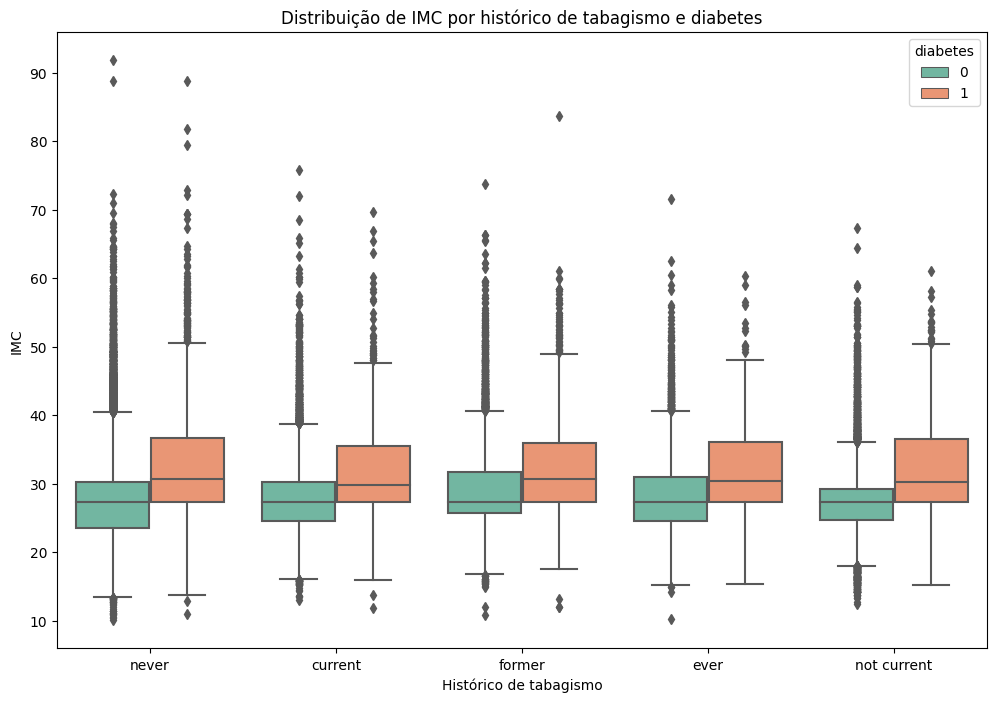

In [25]:
#boxplots do IMC por histórico de tabagismo 
plt.figure(figsize=(12, 8)) #cria figura
sns.boxplot(x='smoking_history', y='bmi', hue='diabetes', data=df[df['smoking_history'] != 'No Info'], palette='Set2') #Cria o gráfico sem o valor "no info" para a variável smoking_history
plt.title('Distribuição de IMC por histórico de tabagismo e diabetes')
plt.xlabel('Histórico de tabagismo') 
plt.ylabel('IMC')
plt.show()

Text(0, 0.5, 'IMC')

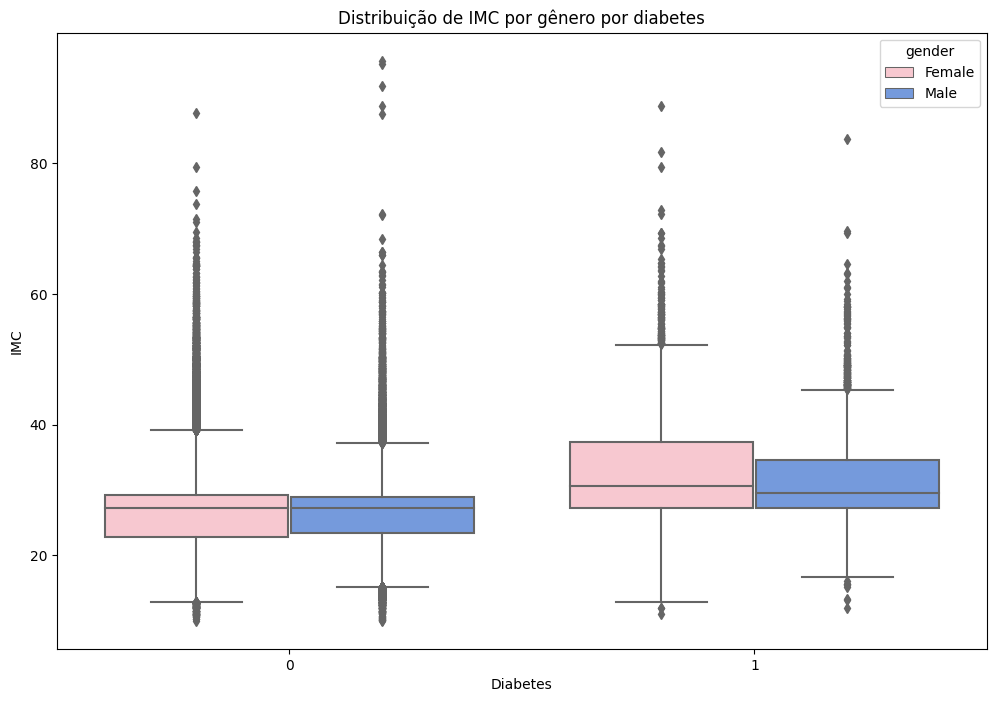

In [26]:
#boxplots de IMC por gênero por diabetes
plt.figure(figsize=(12, 8))
pal_gen = dict(Female='pink', Male='cornflowerblue') #cria um dicionário para servir como paleta
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df, palette=pal_gen)
plt.title('Distribuição de IMC por gênero por diabetes')
plt.xlabel('Diabetes')
plt.ylabel('IMC')

## 3. Insights